## 목표
- 유방암 데이터셋을 활용한 모델링(이진분류)

In [2]:
%cd /content/drive/MyDrive/SMHRD-DL

/content/drive/MyDrive/SMHRD-DL


In [3]:
!pwd

/content/drive/MyDrive/SMHRD-DL


### 1. 데이터 분석에 필요한 라이브러리 3대장

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. sklearn에서 제공하는 유방암 데이터 불러오기

In [8]:
from sklearn.datasets import load_breast_cancer

### 3. 데이터 로드

In [9]:
breast_cancer = load_breast_cancer()

In [9]:
# Dictionary 형태? -> sklearn에서 제공되는 데이터셋은 Bunch 객체 형태
# 머신러닝 데이터셋에서만 사용하는 머신러닝 전용 데이터구조
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
# 모델링에 필요한 필수 데이터 : 'data', 'target' -> 문제 & 답 데이터

In [11]:
X = breast_cancer.data
y = breast_cancer.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [18]:
print(X_train.shape)

(398, 30)


### 4. 데이터 모델링 - 이진분류

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [22]:
model = Sequential()
model.add(InputLayer(shape = (30,)))

#### 4-1. 은닉층 설계

In [23]:
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))

#### 4-2. 출력층 설계

In [24]:
model.add(Dense(units=1, activation='sigmoid'))

#### 4-3. 학습 방법 설정
- 출력 형태에 따라 다르게 설정

In [26]:
model.compile(
    loss = 'binary_crossentropy',  # 이진분류
    optimizer = 'adam',            # 최적화 함수
    metrics = ['accuracy']         # 평가지표
)

#### 4-4. 학습

In [27]:
h = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    epochs = 100
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - accuracy: 0.4177 - loss: 0.7382 - val_accuracy: 0.5667 - val_loss: 0.6994
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6159 - loss: 0.6698 - val_accuracy: 0.5667 - val_loss: 0.7106
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6183 - loss: 0.6723 - val_accuracy: 0.5667 - val_loss: 0.7004
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6315 - loss: 0.6597 - val_accuracy: 0.5667 - val_loss: 0.6984
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6676 - loss: 0.6371 - val_accuracy: 0.5667 - val_loss: 0.6996
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6453 - loss: 0.6504 - val_accuracy: 0.5667 - val_loss: 0.6936
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6663 - loss: 0.6393 - val_accuracy: 0.5667 - val_loss: 0.6977
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6440 - loss: 0.6512 - val_accuracy: 0.5667 - val_loss: 0.

#### 4-5. 평가

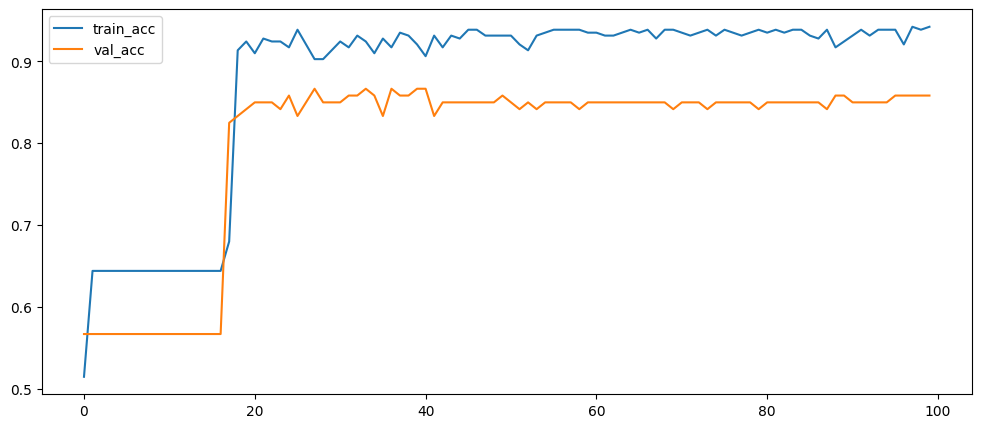

In [28]:
plt.figure(figsize = (12, 5))
plt.plot(h.history['accuracy'], label = 'train_acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

# 초기 epoch에서는 local minima에 빠져있는 모습이 관찰됨
# adam으로 인해서 빠져나와 전역 최소점을 찾아가는 모습이 관찰됨

### 5. 활성화 함수(activation) 역할
- 중간층(역치의 개념, 활성화 여부)
  - 초기 퍼셉트론은 Step Function 활용
  - 추후 sigmoid, tan, relu 함수 등 등장
- 출력층(출력데이터의 형태를 변환)
  - 회귀 : Linear 선형모델이 예측한 값을 그대로 출력, default 값으로 생략이 가능
  - 이진분류 : sigmoid, 선형모델이 예측한 연속형 값을 0과 1 사이의 확률값으로 변경
  - 다중분류 : softmax, 클래스의 개수만큼 확률값을 총합이 1이 되도록 변경


### 6. Loss Function
- 1. Binary Crossentropy
  - y값이 이진분류인 경우 사용
  - activation function : sigmoid

- 2. Categorical Crossentropy
  - y값이 다중분류인 경우 사용
  - activation function : softmax
  - 라벨이 원 핫 인코딩 된 형태로 제공된 경우 사용

- 3. Sparse Categorical Crossentropy
  - y값이 다중분류인 경우 사용
  - activation : softmax
  - 라벨이 정수형인 경우 사용

- 4. MSE(평균 제곱 오차)
  - y값이 연속형인 경우 사용
  - 가장 흔하게 사용 (오차가 크면 클수록 더 큰 패널티를 부여하기 때문)
  - 대체 함수로는 MAE(평균절대오차, 오차값이 0부터 1 사이의 값을 다루는 경우), RMSE(MSE의 왜곡된  값을 제한하고 보고자 하는 경우) 등이 있음